In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics.cluster import adjusted_rand_score

import service
from clustering.KMeans import KMeans
from clustering.KMedoids import KMedoids
from clustering.DBSCAN import DBSCAN
from clustering.AgglomerativeClustering import AgglomerativeClustering

In [79]:
sns.set_style('darkgrid')

### data_1

In [80]:
df = pd.read_csv('data/data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       10 non-null     int64 
 1   y       10 non-null     int64 
 2   label   10 non-null     object
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [81]:
X, labels = df.drop(columns='label'), df['label']
X.shape, labels.shape

((10, 2), (10,))

In [82]:
X = X[['x', 'y']].to_numpy()

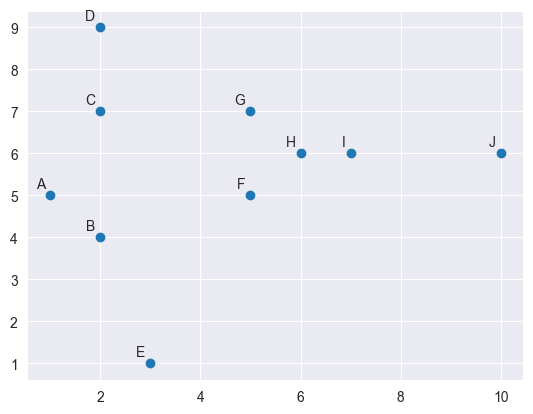

In [83]:
service.plot_raw_data(X, labels)

#### KMeans

In [84]:
n_clusters = 3
init = [[1, 5], [5, 5], [10, 6]]
max_iter = 10
random_state = 42

In [85]:
clusterer = KMeans(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
clusterer.fit(X);

In [86]:
clusterer.n_iter_

2

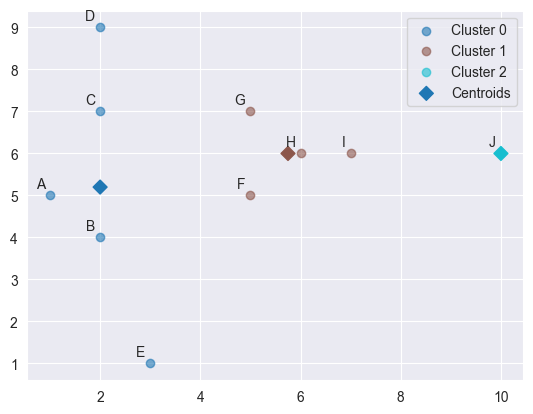

In [87]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
    cluster_centers=clusterer.cluster_centers_,
)

Compare with similar scikit-learn model

In [88]:
sk_clusterer = sklearn.cluster.KMeans(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
sk_clusterer.fit(X);

In [89]:
sk_clusterer.n_iter_

2

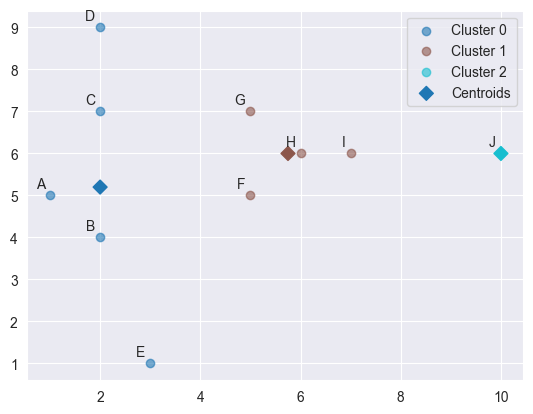

In [90]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
    cluster_centers=sk_clusterer.cluster_centers_,
)

In [91]:
assert adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_) == 1.0
assert np.allclose(clusterer.inertia_, sk_clusterer.inertia_)

#### KMedoids

In [92]:
n_clusters = 3
init = [[5, 5], [5, 7], [6, 6]]
max_iter = 10
random_state = 42

In [93]:
clusterer = KMedoids(
    n_clusters=n_clusters,
    init=init,
    max_iter=max_iter,
    random_state=random_state,
)
clusterer.fit(X);

In [94]:
clusterer.n_iter_

2

In [95]:
clusterer.cluster_center_indices_

array([1, 2, 8])

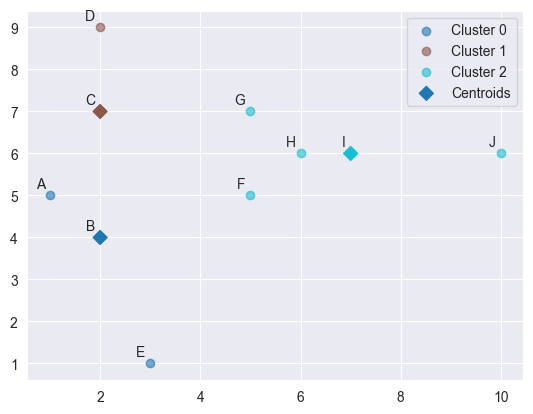

In [96]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
    cluster_centers=clusterer.cluster_centers_,
)

#### DBSCAN

In [97]:
eps = 2.5
min_samples = 3

In [98]:
clusterer = DBSCAN(
    eps=eps,
    min_samples=min_samples,
)
clusterer.fit(X);

In [99]:
clusterer.core_sample_indices_

array([0, 2, 5, 6, 7, 8])

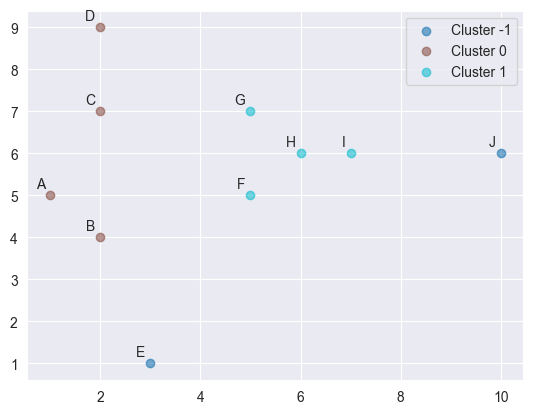

In [100]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

Compare with similar scikit-learn model

In [101]:
sk_clusterer = sklearn.cluster.DBSCAN(
    eps=eps,
    min_samples=min_samples,
)
sk_clusterer.fit(X);

In [102]:
sk_clusterer.core_sample_indices_

array([0, 2, 5, 6, 7, 8])

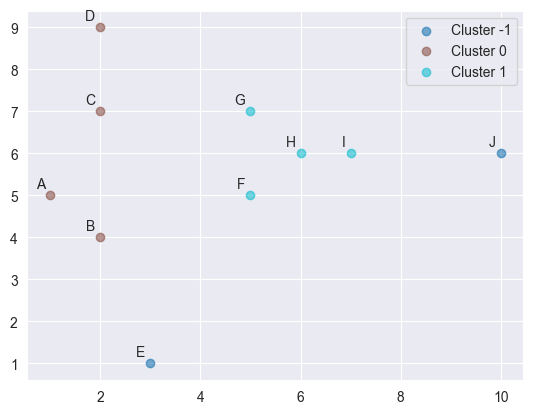

In [103]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

In [104]:
assert adjusted_rand_score(clusterer.labels_, sk_clusterer.labels_) == 1.0

#### AgglomerativeClustering

In [105]:
n_clusters = 3

##### linkage='single'

In [106]:
linkage = 'single'

In [107]:
clusterer = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
)
clusterer.fit(X);

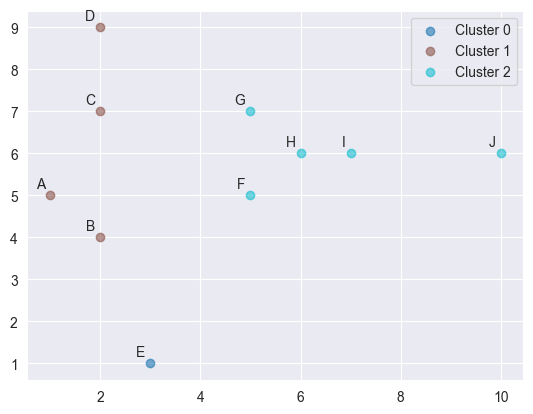

In [108]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

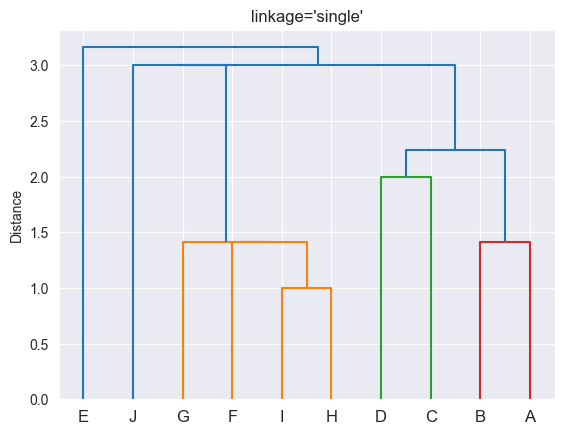

In [109]:
service.plot_dendrogram(
    children=clusterer.children_,
    distances=clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}'",
)

Compare with similar scikit-learn model

In [110]:
sk_clusterer = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
    compute_distances=True,
)
sk_clusterer.fit(X);

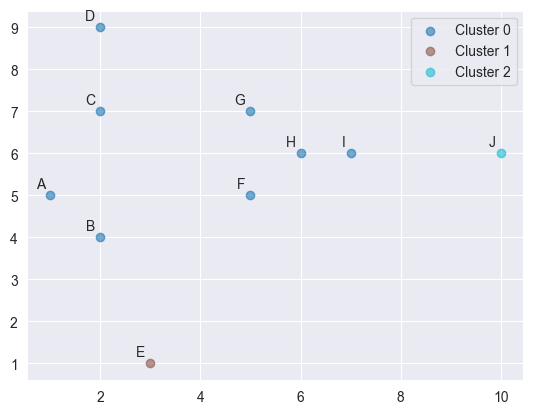

In [111]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

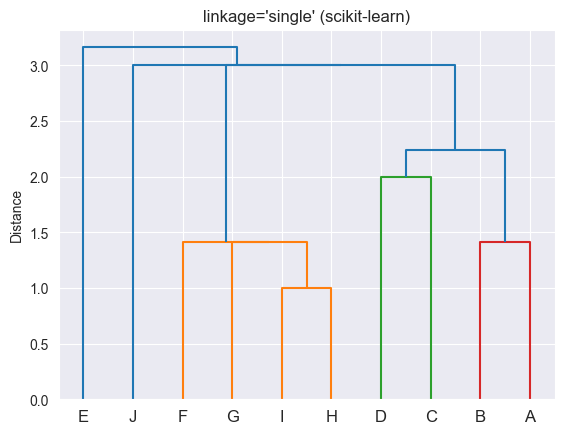

In [112]:
service.plot_dendrogram(
    children=sk_clusterer.children_,
    distances=sk_clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}' (scikit-learn)",
)

In [113]:
assert np.allclose(clusterer.distances_, sk_clusterer.distances_)

##### linkage='complete'

In [114]:
linkage = 'complete'

In [115]:
clusterer = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
)
clusterer.fit(X);

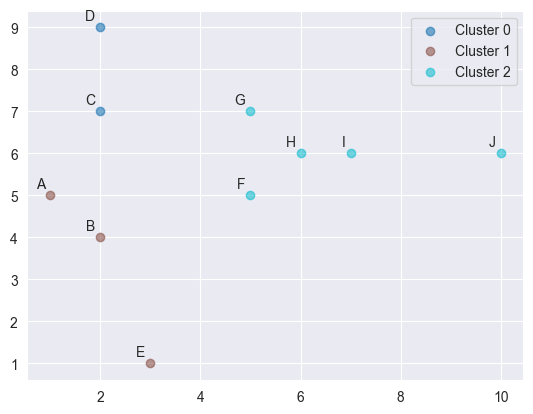

In [116]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

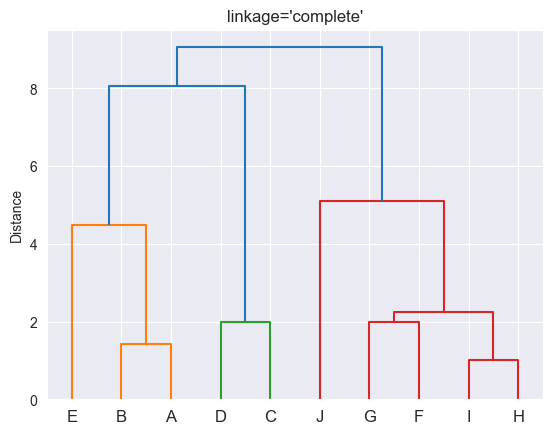

In [117]:
service.plot_dendrogram(
    children=clusterer.children_,
    distances=clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}'",
)

Compare with similar scikit-learn model

In [118]:
sk_clusterer = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
    compute_distances=True,
)
sk_clusterer.fit(X);

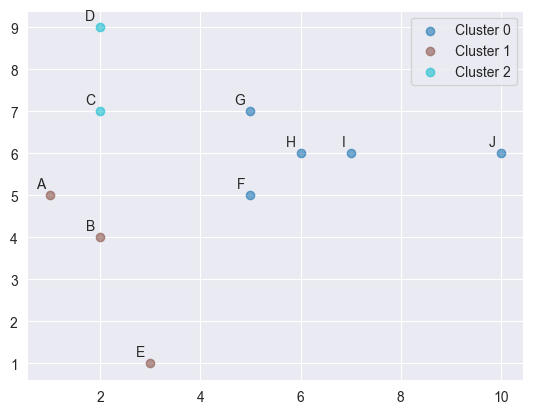

In [119]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

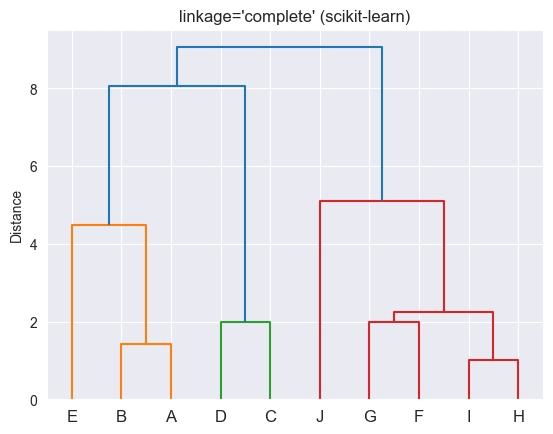

In [120]:
service.plot_dendrogram(
    children=sk_clusterer.children_,
    distances=sk_clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}' (scikit-learn)",
)

In [121]:
assert np.allclose(clusterer.distances_, sk_clusterer.distances_)

##### linkage='average'

In [122]:
linkage = 'average'

In [123]:
clusterer = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
)
clusterer.fit(X);

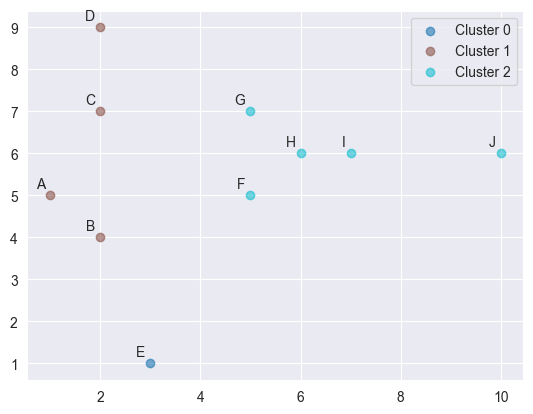

In [124]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

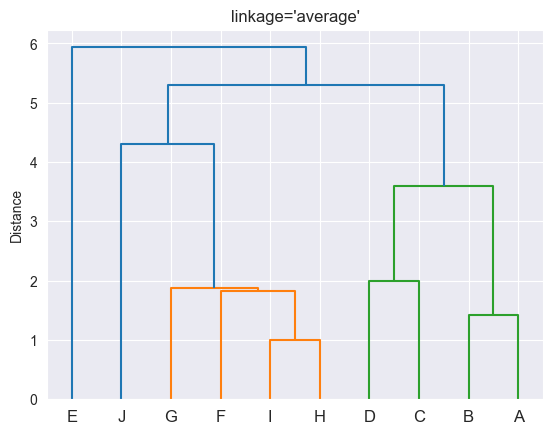

In [125]:
service.plot_dendrogram(
    children=clusterer.children_,
    distances=clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}'",
)

Compare with similar scikit-learn model

In [126]:
sk_clusterer = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
    compute_distances=True,
)
sk_clusterer.fit(X);

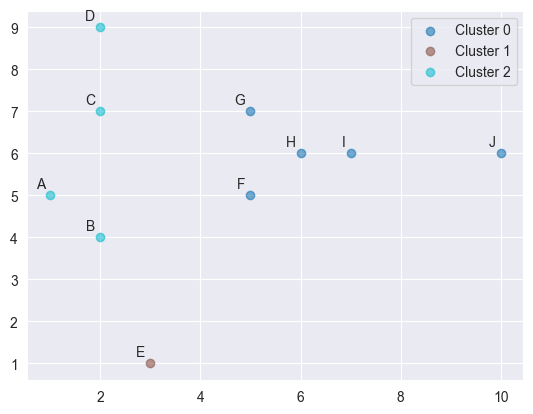

In [127]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

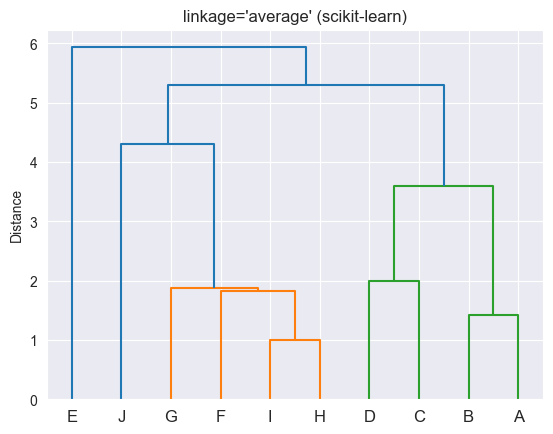

In [128]:
service.plot_dendrogram(
    children=sk_clusterer.children_,
    distances=sk_clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}' (scikit-learn)",
)

In [129]:
assert np.allclose(clusterer.distances_, sk_clusterer.distances_)

##### linkage='ward'

In [130]:
linkage = 'ward'

In [131]:
clusterer = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
)
clusterer.fit(X);

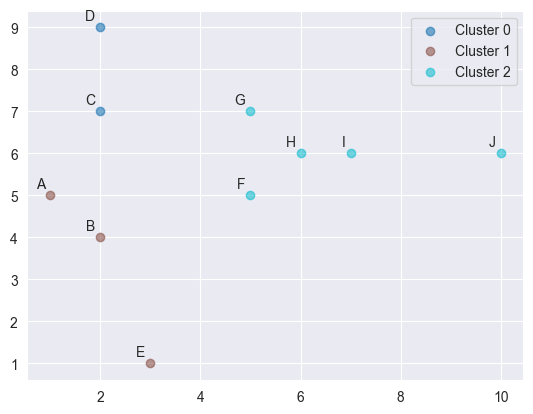

In [132]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=clusterer.labels_,
)

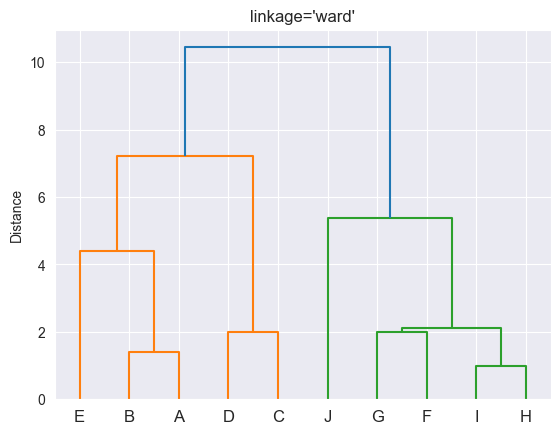

In [133]:
service.plot_dendrogram(
    children=clusterer.children_,
    distances=clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}'",
)

Compare with similar scikit-learn model

In [134]:
sk_clusterer = sklearn.cluster.AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=linkage,
    compute_distances=True,
)
sk_clusterer.fit(X);

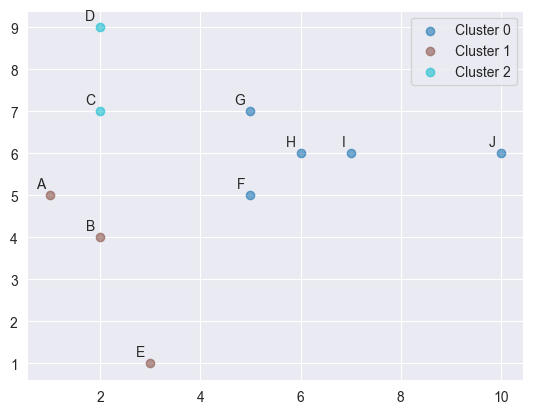

In [135]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_clusterer.labels_,
)

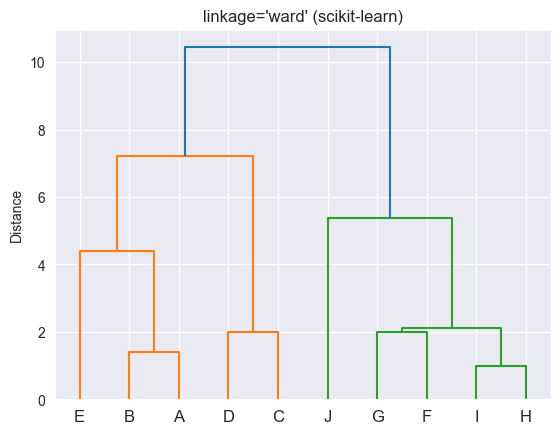

In [136]:
service.plot_dendrogram(
    children=sk_clusterer.children_,
    distances=sk_clusterer.distances_,
    labels=labels.to_numpy(),
    title=f"linkage='{linkage}' (scikit-learn)",
)

In [137]:
assert np.allclose(clusterer.distances_, sk_clusterer.distances_)

### More datasets

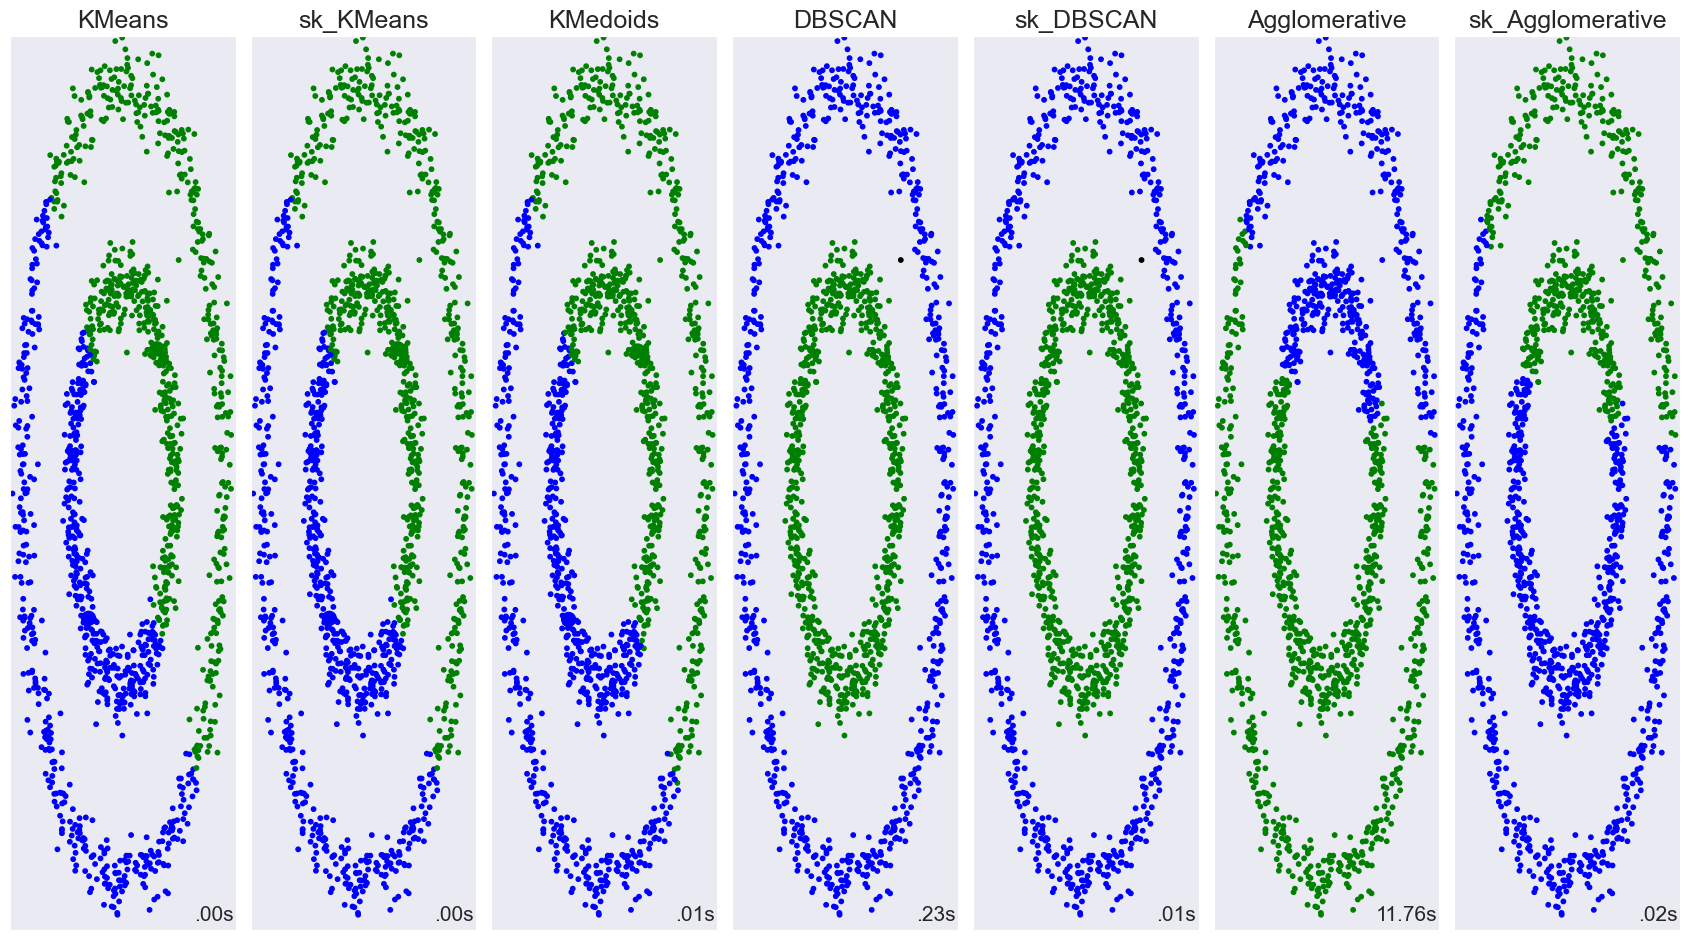

In [138]:
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets
n_samples = 1500
datasets_list = [
    (sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05), "Noisy Circles"),
    # (sklearn.datasets.make_moons(n_samples=n_samples, noise=.05), "Noisy Moons"),
    # (sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8), "Blobs"),
    # ((np.random.rand(n_samples, 2), None), "No Structure")
]

# Define clusterers
init = [[-1, -1], [1, 1]]
# clusterers = [
#     [
#         ("KMeans", KMeans(n_clusters=2, init=init)),
#         ("sk_KMeans", sklearn.cluster.KMeans(n_clusters=2, init=init)),
#     ],
#     [
#         ("KMedoids", KMedoids(n_clusters=2, init=init)),
#     ],
#     [
#         ("DBSCAN", DBSCAN(eps=0.2)),
#         ("sk_DBSCAN", sklearn.cluster.DBSCAN(eps=0.2, algorithm='brute')),
#     ],
#     [
#         ("Agglomerative", AgglomerativeClustering(n_clusters=2)),
#         ("sk_Agglomerative", sklearn.cluster.AgglomerativeClustering(n_clusters=2)),
#     ]
# ]
clusterers = [
    ("KMeans", KMeans(n_clusters=2, init=init)),
    ("sk_KMeans", sklearn.cluster.KMeans(n_clusters=2, init=init)),
    ("KMedoids", KMedoids(n_clusters=2, init=init)),
    ("DBSCAN", DBSCAN(eps=0.2)),
    ("sk_DBSCAN", sklearn.cluster.DBSCAN(eps=0.2, algorithm='brute')),
    ("Agglomerative", AgglomerativeClustering(n_clusters=2)),
    ("sk_Agglomerative", sklearn.cluster.AgglomerativeClustering(n_clusters=2)),
]

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(17, 9.5))
plt.subplots_adjust(left=0.001, right=0.999, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01)

plot_num = 1
for dataset, dataset_name in datasets_list:
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    for name, algorithm in clusterers:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        y_pred = algorithm.labels_.astype(int)

        plt.subplot(len(datasets_list), len(clusterers), plot_num)
        if plot_num <= len(clusterers):
            plt.title(name, size=18)

        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)

        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(0.99, 0.01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.tight_layout()
plt.show()

### Country data

In [139]:
df = pd.read_csv('data/country_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [140]:
X = df.drop(columns=['country'])
labels = df['country']
X.shape, labels.shape

((167, 9), (167,))

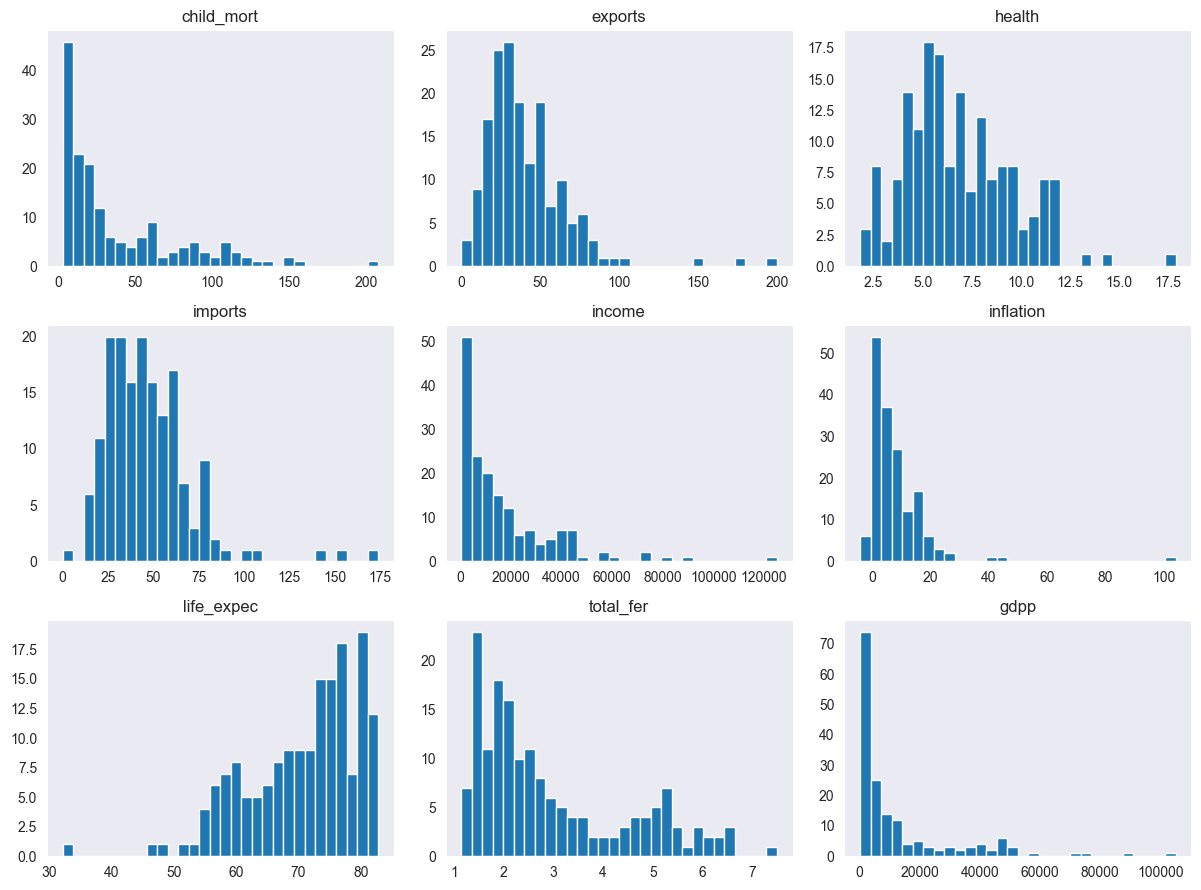

In [141]:
df.hist(figsize=(12, 9), bins=30, grid=False, xrot=0)
plt.tight_layout()
plt.show()

In [142]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
X = pca.fit_transform(X)

X.shape

(167, 2)

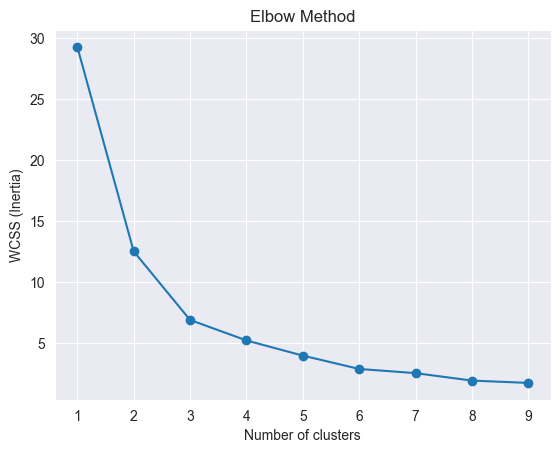

In [143]:
n_range = range(1, 10)
inertia_list = []
for n in n_range:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(n_range, inertia_list, 'o-')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [144]:
n_clusters = 3

In [145]:
clusterer = KMeans(n_clusters=n_clusters, random_state=42)
clusterer.fit(X);

In [146]:
countries = [
    "United States", "Switzerland", "Ukraine", "Netherlands", "Luxembourg", "Egypt",
    "Ireland", "Pakistan", "Saudi Arabia", "Japan", "Mauritania", "Singapore",
    "Equatorial Guinea", "Congo, Dem. Rep.", "Nigeria", "Kazakhstan", "Poland",
    "Qatar", "Sweden", "India", "China", "Iraq", "Israel", "Russia", "Sudan",
]
country_indices = np.where(np.isin(labels, countries))[0]
len(countries), len(country_indices)

(25, 25)

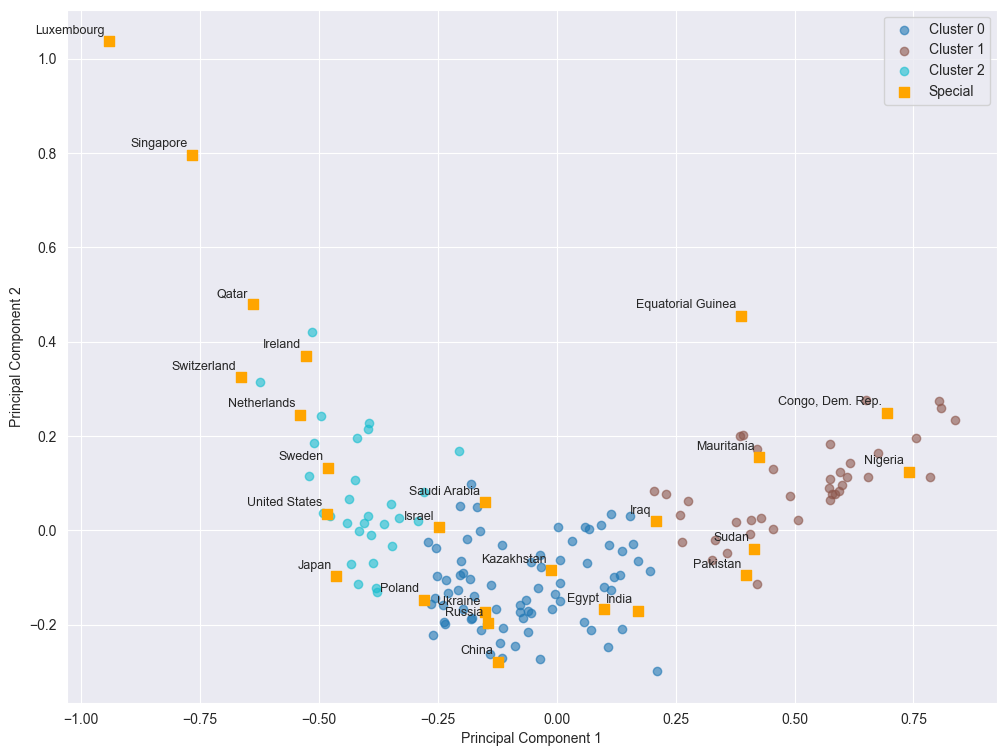

In [147]:
service.plot_clusters(
    X,
    cluster_labels=clusterer.labels_,
    labels=labels,
    special_indices=country_indices,
    text_shift=0.01,
    fontsize=9,
    figsize=(12, 9),
    xlabel="Principal Component 1",
    ylabel="Principal Component 2",
)

In [148]:
clusterers = [
    ("KMeans", KMeans(n_clusters=n_clusters, random_state=42)),
    ("KMedoids", KMedoids(n_clusters=n_clusters, random_state=42)),
    ("Aggl.(single)", AgglomerativeClustering(n_clusters=n_clusters, linkage='single')),
    ("Aggl.(complete)", AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')),
    ("Aggl.(average)", AgglomerativeClustering(n_clusters=n_clusters, linkage='average')),
    ("Aggl.(ward)", AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')),
]

In [149]:
res_df = pd.DataFrame(index=labels)
for clusterer_str, clusterer in clusterers:
    clusterer.fit(X)
    country_clusters = dict(zip(labels, clusterer.labels_))
    ukraine_cluster = country_clusters['Ukraine']
    res_df[clusterer_str] = [
        1 if country_clusters[country] == ukraine_cluster else 0
        for country in labels
    ]
res_df.insert(0, '% Occ.', round(res_df.mean(axis=1) * 100, 1))
res_df.sort_values(by=['% Occ.'], ascending=False, inplace=True)

res_df

,% Occ.,KMeans,KMedoids,Aggl.(single),Aggl.(complete),Aggl.(average),Aggl.(ward)
country,,,,,,,
Albania,100.0,1,1,1,1,1,1
Algeria,100.0,1,1,1,1,1,1
Antigua and Barbuda,100.0,1,1,1,1,1,1
Armenia,100.0,1,1,1,1,1,1
Argentina,100.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Sudan,16.7,0,0,1,0,0,0
Zambia,16.7,0,0,1,0,0,0
Uganda,16.7,0,0,1,0,0,0


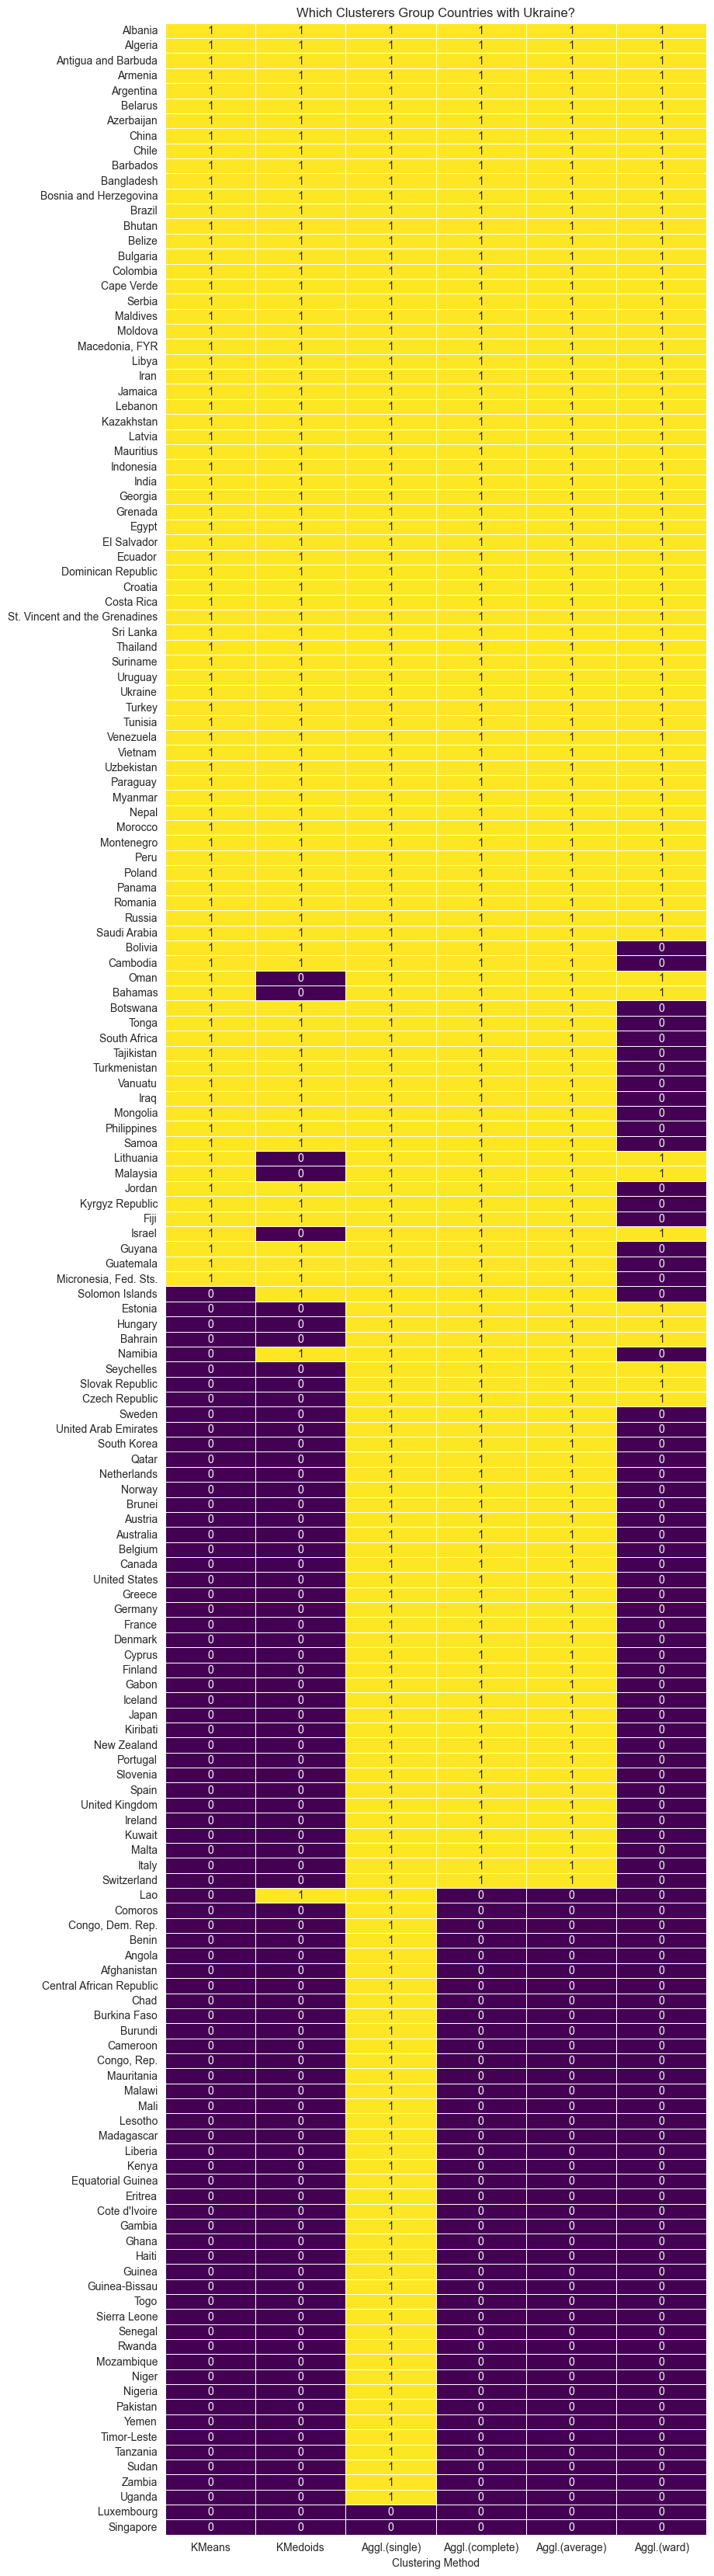

In [150]:
plt.figure(figsize=(9, 42))
sns.heatmap(
    data=res_df.drop(columns='% Occ.'),
    cmap='viridis',
    linewidths=0.5,
    annot=True,
    cbar=False,
)

plt.title("Which Clusterers Group Countries with Ukraine?")
plt.xlabel("Clustering Method")
plt.ylabel("")
plt.show()

### Check clusterers (scikit-learn)

In [151]:
clusterers = [
    KMeans(),
    KMedoids(),
    DBSCAN(),
    AgglomerativeClustering(),
]  # TODO

In [152]:
from sklearn.utils.estimator_checks import estimator_checks_generator

for clusterer in clusterers:
    total_checks = 0
    skipped_checks = 0  # TODO remove?
    for (estimator, check) in estimator_checks_generator(clusterer):
        total_checks += 1
        check(estimator)
    skipped_percentage = skipped_checks / total_checks * 100
    print(f"{clusterer}: {skipped_checks} out of {total_checks} checks skipped ({skipped_percentage:.2f}%).")

KMeans(): 0 out of 46 checks skipped (0.00%).
KMedoids(): 0 out of 46 checks skipped (0.00%).
DBSCAN(): 0 out of 46 checks skipped (0.00%).
AgglomerativeClustering(): 0 out of 46 checks skipped (0.00%).
